<a href="https://colab.research.google.com/github/Abhijithpilakka/Ship_Truck_Classifier/blob/main/Ship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
X_train, y_train = X_train[(y_train == 8) | (y_train == 9)] , y_train[(y_train == 8) | (y_train == 9)]
X_test, y_test = X_test[(y_test == 8) | (y_test == 9)] , y_test[(y_test == 8) | (y_test == 9)]

In [ ]:
y_train.shape

(10000,)

In [ ]:
X_train.shape

(10000, 32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

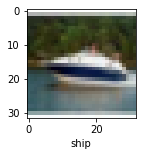

In [ ]:
plot_sample(X_train, y_train, 273)

Normalizing the training data

In [ ]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# ann = models.Sequential([
#        layers.Flatten(input_shape=(32,32,3)),
#       layers.Dense(3000, activation='relu'),
#        layers.Dense(1000, activation='relu'),
#        layers.Dense(10, activation='softmax')    
#    ])

#ann.compile(optimizer='SGD',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

# ann.fit(X_train, y_train, epochs=5) 

In [ ]:
#from sklearn.metrics import confusion_matrix , classification_report
#import numpy as np
#y_pred = ann.predict(X_test)
#y_pred_classes = [np.argmax(element) for element in y_pred]

#print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
313/313 [==============================] - 32s 3ms/step - loss: 0.4391 - accuracy: 0.8045
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.8726
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.9065
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.9211
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1867 - accuracy: 0.9247
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1617 - accuracy: 0.9346
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1512 - accuracy: 0.9408
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1403 - accuracy: 0.9436
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1271 - accuracy: 0.9528
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1097 - accuracy: 0.959

In [ ]:
cnn.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9345


[0.17977380752563477, 0.934499979019165]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[7.4662756e-09, 1.9851698e-09, 2.2317905e-09, 2.3600299e-09,
        5.6115956e-10, 2.9123462e-10, 2.0786235e-09, 9.5565034e-10,
        9.9486154e-01, 5.1384117e-03],
       [1.5636870e-07, 5.0122782e-08, 7.7986527e-08, 7.5401090e-08,
        2.1299073e-08, 1.0772702e-08, 8.4495980e-08, 2.7621256e-08,
        9.8351109e-01, 1.6488453e-02],
       [5.5489313e-10, 5.4841871e-11, 7.9473400e-10, 3.1849820e-10,
        1.5827450e-11, 4.0407407e-11, 3.6355538e-10, 3.0275310e-10,
        4.6443408e-03, 9.9535573e-01],
       [4.5679707e-11, 3.2234213e-12, 7.0846121e-11, 3.1964476e-11,
        9.3794568e-13, 2.3585799e-12, 3.5309852e-11, 2.5911259e-11,
        1.8073373e-03, 9.9819273e-01],
       [1.5116643e-07, 3.9404078e-08, 6.1397664e-08, 5.1362818e-08,
        2.5577421e-08, 9.9180149e-09, 5.9513312e-08, 2.1066477e-08,
        9.9013841e-01, 9.8611210e-03]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 9, 9, 8]

save the model

In [ ]:
cnn.save("Cifar_ship_truck.h5")